### Routes Analysis

Which routes (origin → destination) have the highest probability of delay (≥15 min)?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)  # para ver todas las columnas

In [2]:
df_airlines = pd.read_csv('../data/ontime_2025.csv')
df_airlines.head(5)

,year,month,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,dest,dest_city_name,dest_state_abr,dep_time,dep_delay_new,dep_del15,arr_time,arr_delay_new,arr_del15,cancelled,cancellation_code,carrier_delay,weather_delay,nas_delay,security_delay,dep_time_dt,arr_time_dt,dep_bin,season,delay_category,fl_date
0,2024,11,1,5,9E,20363,4800,CLT,"Charlotte, NC",NC,LGA,"New York, NY",NY,18:28:00,52.0,1.0,20:15:00,36.0,1.0,0.0,E,6.0,0.0,0.0,0.0,1900-01-01 18:28:00,1900-01-01 20:15:00,Early Evening,Autumn,Moderate Delay,2024-11-01
1,2024,11,1,5,9E,20363,4801,CVG,"Cincinnati, OH",KY,DTW,"Detroit, MI",MI,17:41:00,0.0,0.0,18:49:00,0.0,0.0,0.0,E,0.0,0.0,0.0,0.0,1900-01-01 17:41:00,1900-01-01 18:49:00,Afternoon,Autumn,On Time,2024-11-01
2,2024,11,1,5,9E,20363,4802,DSM,"Des Moines, IA",IA,MSP,"Minneapolis, MN",MN,15:54:00,0.0,0.0,16:57:00,0.0,0.0,0.0,E,0.0,0.0,0.0,0.0,1900-01-01 15:54:00,1900-01-01 16:57:00,Afternoon,Autumn,On Time,2024-11-01
3,2024,11,1,5,9E,20363,4803,CVG,"Cincinnati, OH",KY,DTW,"Detroit, MI",MI,13:50:00,0.0,0.0,14:55:00,0.0,0.0,0.0,E,0.0,0.0,0.0,0.0,1900-01-01 13:50:00,1900-01-01 14:55:00,Midday,Autumn,On Time,2024-11-01
4,2024,11,1,5,9E,20363,4804,GSP,"Greer, SC",SC,LGA,"New York, NY",NY,12:45:00,0.0,0.0,14:35:00,0.0,0.0,0.0,E,0.0,0.0,0.0,0.0,1900-01-01 12:45:00,1900-01-01 14:35:00,Midday,Autumn,On Time,2024-11-01


In [3]:
df_routes = df_airlines[df_airlines['cancelled'] == 0].copy()

df_routes['route'] = df_routes['origin'] + ' → ' + df_routes['dest']

In [15]:
route_stats = (
    df_routes
    .groupby('route')
    .agg(
        total_flights=('dep_del15', 'size'),
        delayed_flights=('dep_del15', 'sum'),
        delay_rate=('dep_del15', 'mean'),
        avg_dep_delay=('dep_delay_new', 'mean')
    )
    .reset_index()
)

In [16]:
route_stats = route_stats[route_stats['total_flights'] >= 50]

In [17]:
top_delay_routes = (
    route_stats
    .sort_values('delay_rate', ascending=False)
    .head(15)
)

top_delay_routes

,route,total_flights,delayed_flights,delay_rate,avg_dep_delay
5620,ROA → SFB,125,84.0,0.672000,72.624000
3730,LIT → SFB,62,41.0,0.661290,45.064516
6720,TRI → SFB,122,75.0,0.614754,53.401639
1108,CKB → SFB,111,68.0,0.612613,89.198198
119,ANC → ATL,116,71.0,0.612069,37.112069
6719,TRI → PIE,53,32.0,0.603774,69.358491
6655,TOL → SFB,111,67.0,0.603604,53.630631
3589,LEX → SFB,219,132.0,0.602740,62.063927
1509,DCA → AUS,362,218.0,0.602210,40.207182
2839,HTS → SFB,147,87.0,0.591837,51.149660


Top 10 Routes with Highest Departure Delay Probability:

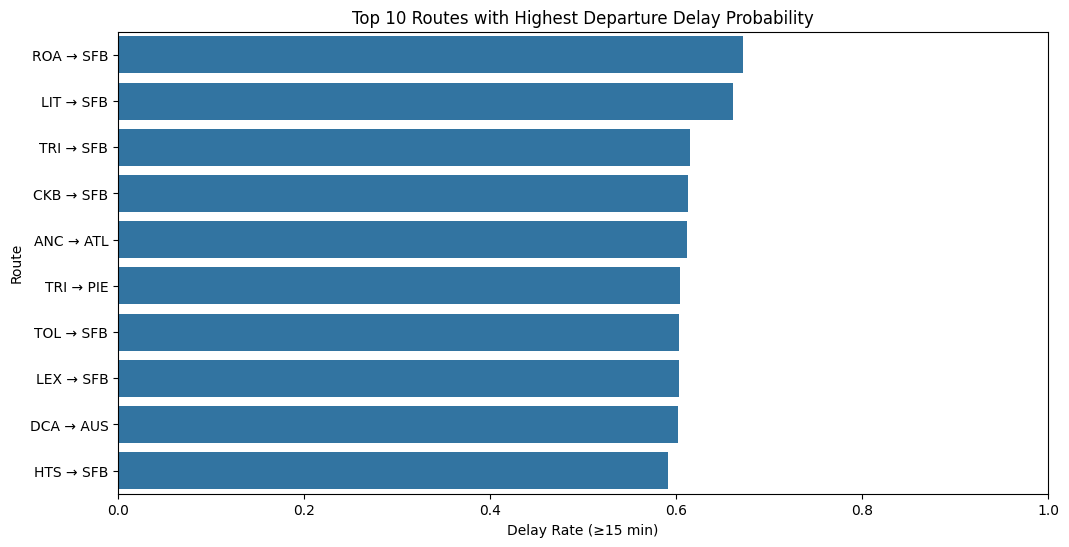

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_delay_routes.head(10),
    x='delay_rate',
    y='route'
)

plt.title('Top 10 Routes with Highest Departure Delay Probability')
plt.xlabel('Delay Rate (≥15 min)')
plt.ylabel('Route')
plt.xlim(0, 1)
plt.show()

Delay Rate vs Route Volume:

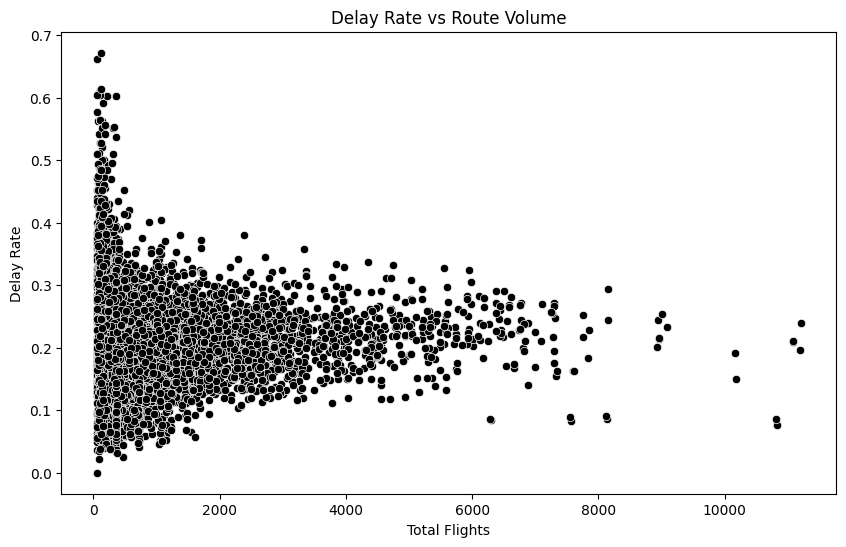

In [19]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=route_stats,
    x='total_flights',
    y='delay_rate',
    color='black'
)

plt.title('Delay Rate vs Route Volume')
plt.xlabel('Total Flights')
plt.ylabel('Delay Rate')
plt.show()